# EDA beta concatenated

First we do some cleaning of the dataset because there are some unused and alpha-chain specific columns.

In [115]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../../data/customDatasets/beta_concatenated.tsv", sep='\t', low_memory=False)
df = df.drop(columns=["Linker", "Link_order", "TCR_name", "TRA_leader", "TRB_leader", "TRAV", "TRAJ", "TRA_CDR3", "TRAC", "TRBC", "TRA_CDR3", "TRA_3_prime_seq", "TRA_5_prime_seq", "TRB_3_prime_seq", "TRB_5_prime_seq"])
print(f"the whole dataset has {len(df)} entries and the following columns are considered for this notebook:")
df.head()

the whole dataset has 229862 entries and the following columns are considered for this notebook:


,TRBV,TRBJ,TRB_CDR3,Epitope,Score,MHC A,MHC B,MHC class,Binding
0,TRBV13*01,TRBJ1-5*01,CASSYLPGQGDHYSNQPQHF,FLKEKGGL,2.0,HLA-B*08,NaN,MHCI,1
1,TRBV13*01,TRBJ1-5*01,CASSFEAGQGFFSNQPQHF,FLKEKGGL,2.0,HLA-B*08,NaN,MHCI,1
2,TRBV13*01,TRBJ1-5*01,CASSFEPGQGFYSNQPQHF,FLKEKGGL,2.0,HLA-B*08,NaN,MHCI,1
3,TRBV13*01,TRBJ1-5*01,CASSYEPGQVSHYSNQPQHF,FLKEKGGL,2.0,HLA-B*08,NaN,MHCI,1
4,TRBV14*01,TRBJ2-1*01,CASSALASLNEQFF,FLKEKGGL,2.0,HLA-B*08,NaN,MHCI,1


## Epitopes

In [116]:
unique_epitope_count = df["Epitope"].value_counts().count()
epitope_count = df["Epitope"].notnull().sum()
print(f"there are {epitope_count} epitopes and {unique_epitope_count} unique epitopes")

there are 229862 epitopes and 2454 unique epitopes


Now a visualisation of how the epitopes are distributed.

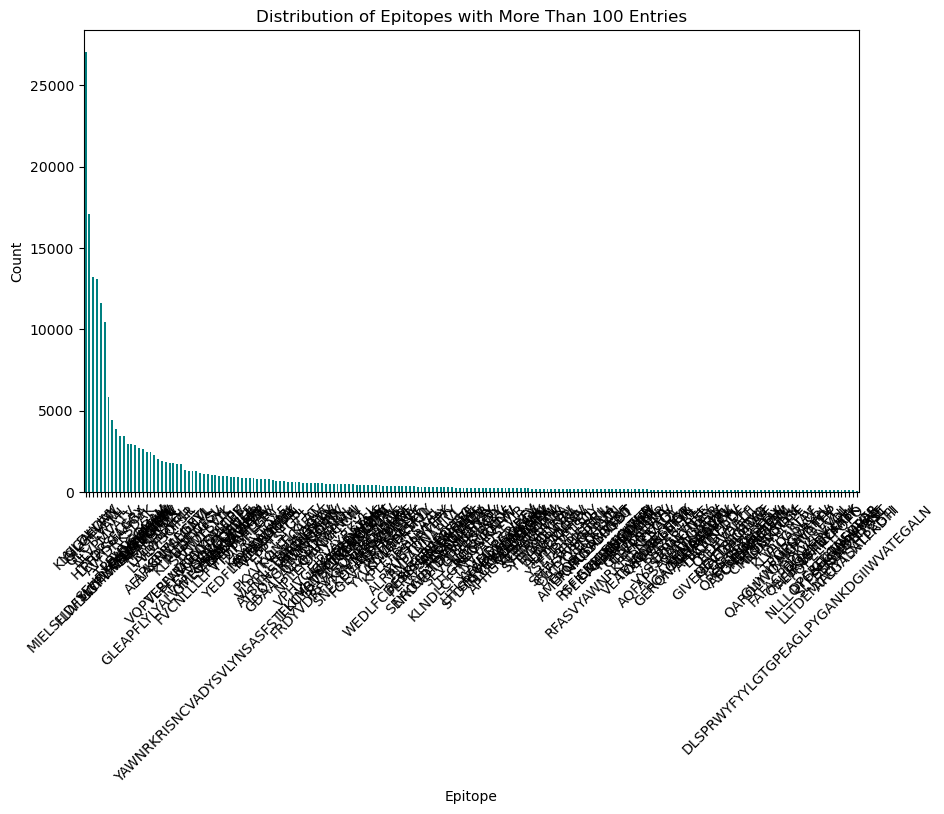

In [117]:
# Count the occurrences of each Epitope
epitope_counts = df['Epitope'].value_counts()

# Filter Epitopes that have more than 2 entries
filtered_epitope_counts = epitope_counts[epitope_counts > 100]

# Plotting
plt.figure(figsize=(10, 6))
filtered_epitope_counts.plot(kind='bar', color='teal')
plt.xlabel('Epitope')
plt.ylabel('Count')
plt.title('Distribution of Epitopes with More Than 100 Entries')
plt.xticks(rotation=45)
plt.show()

## CDR-3 Regions (beta)

In [118]:
unique_cdr_count = df["TRB_CDR3"].value_counts().count()
print(f"there are {unique_cdr_count} unique CDR-3 beta regions")

there are 165689 unique CDR-3 beta regions


Distribution of TRB_CDR3 Sequence Lengths

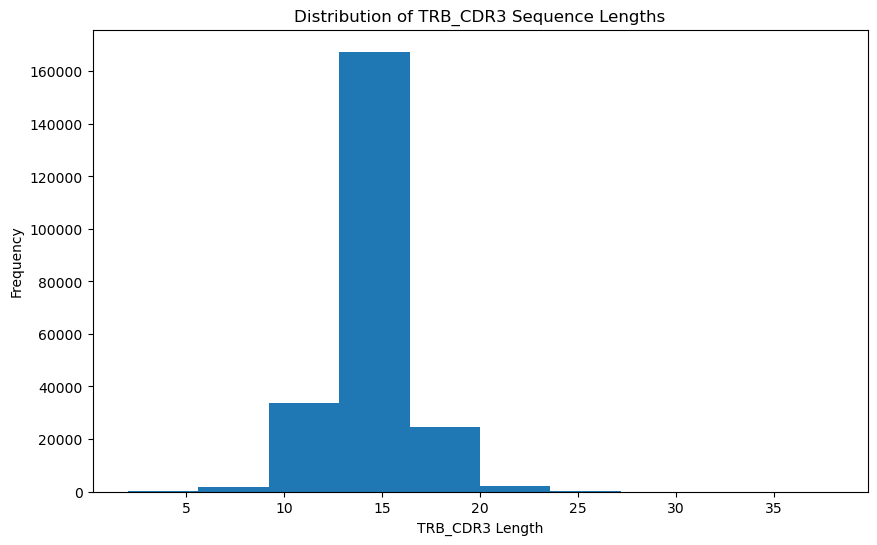

In [119]:
# Calculate TRB_CDR3 sequence lengths
df['TRB_CDR3_Length'] = df['TRB_CDR3'].apply(len)

plt.figure(figsize=(10, 6))
plt.hist(df['TRB_CDR3_Length'])
plt.title('Distribution of TRB_CDR3 Sequence Lengths')
plt.xlabel('TRB_CDR3 Length')
plt.ylabel('Frequency')
plt.show()

## V and J region (beta)

How many entries do have V **and** J region

In [120]:
paired_VJ_count = df[["TRBV", "TRBJ"]].notnull().all(axis=1).sum()
print(f"There are {paired_VJ_count} entries which have the V and J region")

There are 204210 entries which have the V and J region


visual representation of the distribution of V and J regions. 

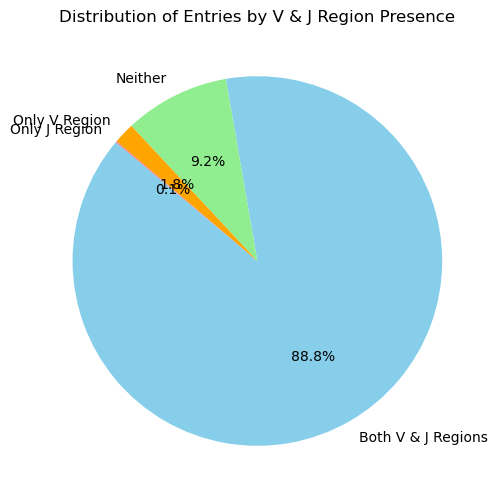

In [121]:
# Define a function to categorize each entry
def categorize_row(row):
    if pd.notnull(row['TRBV']) and pd.notnull(row['TRBJ']):
        return 'Both V & J Regions'
    elif pd.notnull(row['TRBV']):
        return 'Only V Region'
    elif pd.notnull(row['TRBJ']):
        return 'Only J Region'
    else:
        return 'Neither'

# Apply the function to each row
df['Category'] = df.apply(categorize_row, axis=1)

# Count the number of entries in each category
category_counts = df['Category'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'orange', 'lightcoral'])
plt.title('Distribution of Entries by V & J Region Presence')
plt.show()

Exploring how many unique combinations of TRBV and TRBJ genes there are could be informative. This might help in understanding the diversity of T-cell receptor beta chains represented in data.

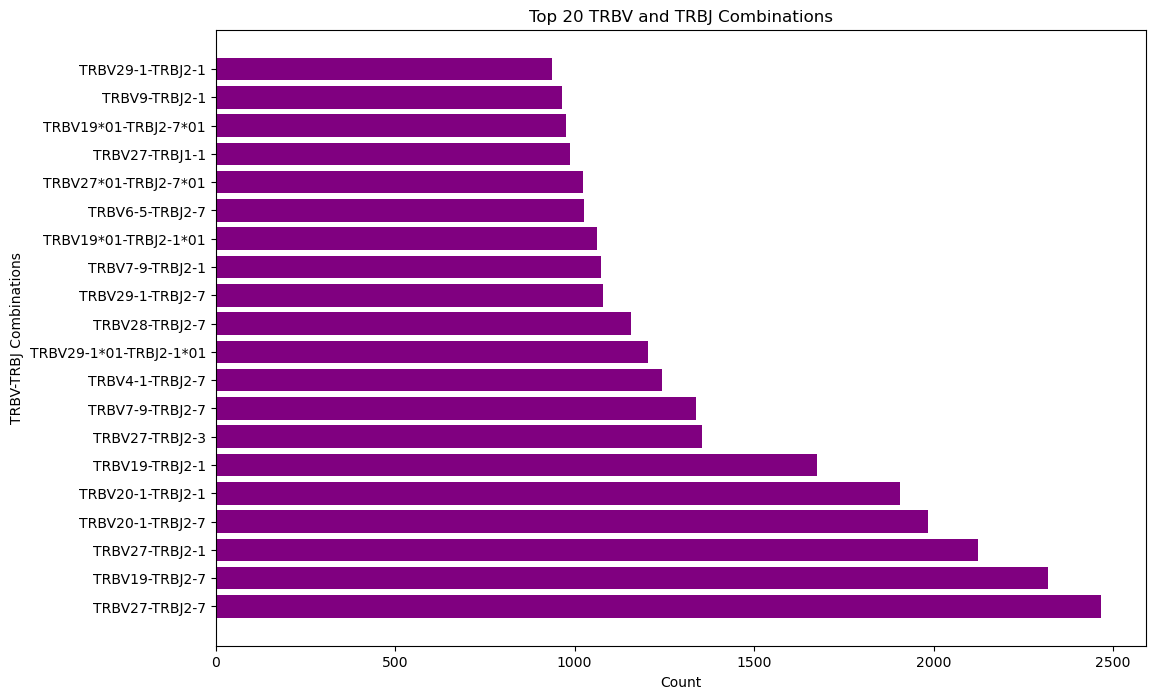

In [122]:
# Count unique TRBV and TRBJ combinations
unique_combinations = df.groupby(['TRBV', 'TRBJ']).size().reset_index(name='Count')

# Plotting the top 20 most frequent combinations
top_combinations = unique_combinations.sort_values(by='Count', ascending=False).head(20)

plt.figure(figsize=(12, 8))
plt.barh(top_combinations['TRBV'] + '-' + top_combinations['TRBJ'], top_combinations['Count'], color='purple')
plt.xlabel('Count')
plt.ylabel('TRBV-TRBJ Combinations')
plt.title('Top 20 TRBV and TRBJ Combinations')
plt.show()

### V Region
How many entries do have a V region and how many different V regions are there

In [123]:
unique_V_count = df['TRBV'].nunique()
print(f"There are {unique_V_count} unique V regions")

There are 460 unique V regions


In [124]:
V_count = df["TRBV"].notnull().sum()
print(f"There are {V_count} entries for J region")

There are 208411 entries for J region


### J Region
How many entries do have J region and how many different J regions are there

In [125]:
unique_J_count = df["TRBJ"].nunique()
print(f"There are {unique_J_count} unique J regions")

There are 107 unique J regions


In [126]:
J_count = df["TRBJ"].notnull().sum()
print(f"There are {J_count} entries for J region")

There are 204474 entries for J region


## MHC
How many entries do have MHC A **and** MHC B value

In [127]:
paired_MHC_count = df[["MHC A", "MHC B"]].notnull().all(axis=1).sum()
print(f"There are {paired_MHC_count} entries which have the MHC A and MHC B region")

There are 12456 entries which have the MHC A and MHC B region


Distribution of MHC classes

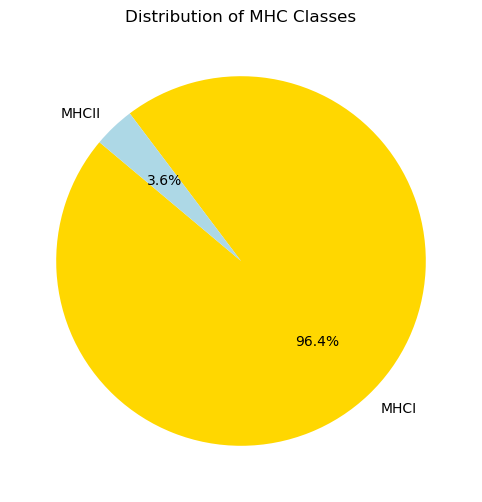

In [128]:
mhc_class_counts = df['MHC class'].value_counts()

plt.figure(figsize=(10, 6))
mhc_class_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['gold', 'lightblue', 'lightcoral'])
plt.title('Distribution of MHC Classes')
plt.ylabel('')  # Hide the y-label as it's unnecessary for pie charts
plt.show()

### MHC A

In [129]:
unique_MHCa_count = df["MHC A"].nunique()
print(f"There are {unique_MHCa_count} unique MHC A values")

There are 152 unique MHC A values


In [130]:
MHCa_count = df["MHC A"].notnull().sum()
print(f"There are {MHCa_count} entries MHC A")

There are 138109 entries MHC A


Distribution of MHC A

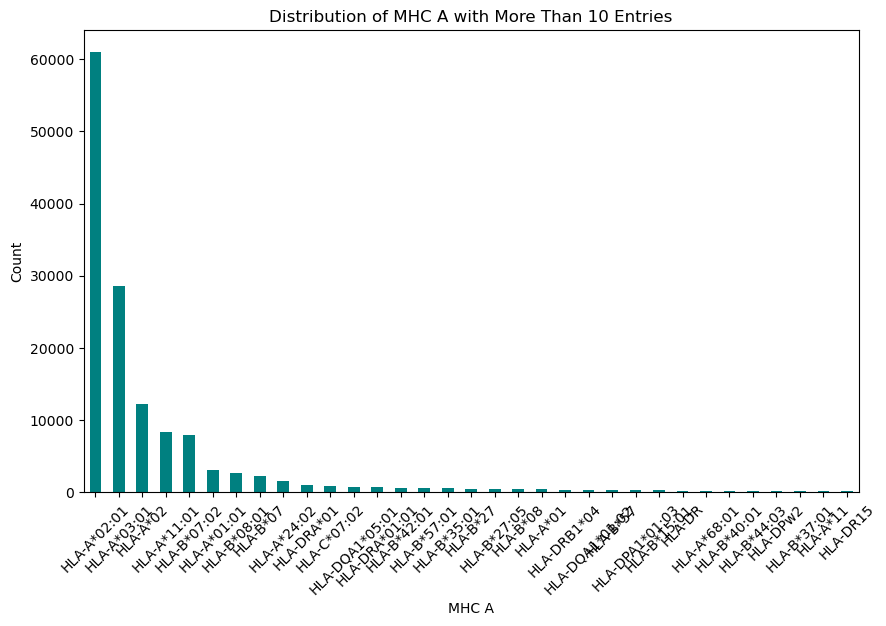

In [131]:
# Count the occurrences of each MHC A
mhc_counts = df['MHC A'].value_counts()

# Filter Epitopes that have more than 2 entries
filtered_mhc_counts = mhc_counts[mhc_counts > 100]

# Plotting
plt.figure(figsize=(10, 6))
filtered_mhc_counts.plot(kind='bar', color='teal')
plt.xlabel('MHC A')
plt.ylabel('Count')
plt.title('Distribution of MHC A with More Than 10 Entries')
plt.xticks(rotation=45)
plt.show()

### MHC B

In [132]:
unique_MHCb_count = df["MHC B"].nunique()
print(f"There are {unique_MHCb_count} unique MHC B values")

There are 95 unique MHC B values


In [133]:
MHCb_count = df["MHC B"].notnull().sum()
print(f"There are {MHCb_count} entries for MHC B")

There are 15279 entries for MHC B


Distribution of MHC A

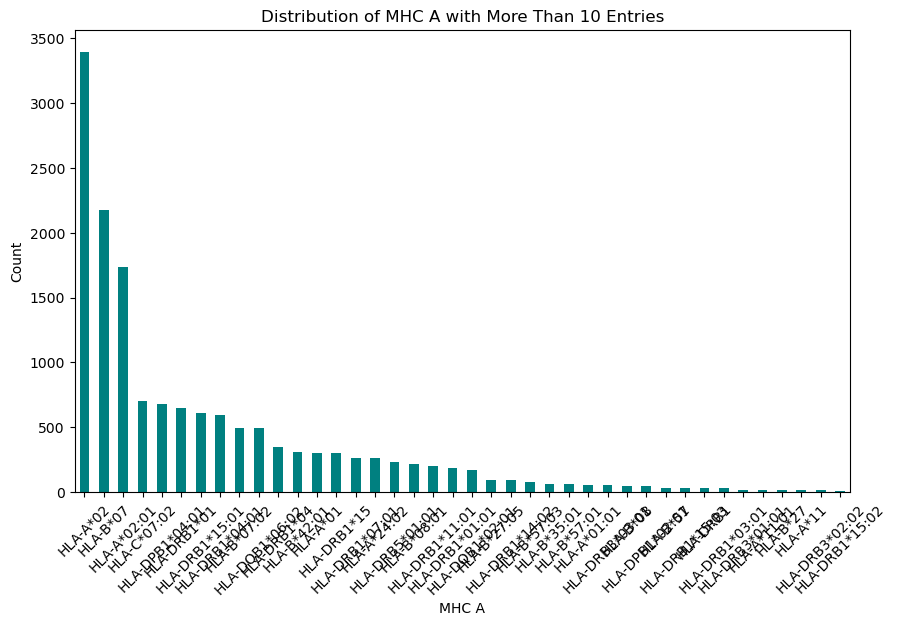

In [134]:
# Count the occurrences of each MHC B
mhc_counts = df['MHC B'].value_counts()

# Filter Epitopes that have more than 2 entries
filtered_mhc_counts = mhc_counts[mhc_counts > 10]

# Plotting
plt.figure(figsize=(10, 6))
filtered_mhc_counts.plot(kind='bar', color='teal')
plt.xlabel('MHC A')
plt.ylabel('Count')
plt.title('Distribution of MHC A with More Than 10 Entries')
plt.xticks(rotation=45)
plt.show()